In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 
#for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts.
#Many customers of the company are wholesalers.

In [2]:
data = pd.read_csv('Online_Retail.csv', encoding='unicode_escape')

In [3]:
#overview of Data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
print('Rows:-{}'.format(data.shape[0]))
print('Columns:-{}'.format(data.shape[1]))

Rows:-541909
Columns:-8


In [4]:
#Data Types
data.dtypes.value_counts()

object     5
float64    2
int64      1
dtype: int64

In [5]:
#Missing Values 
data.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
#statisitcs of data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#Dublicated Values 
data.duplicated().sum()

5268

In [8]:
#Droppin null/missing values
data.isnull().sum().sort_values(ascending = False) #before
data.dropna(axis=0,inplace = True,subset= 'CustomerID')
data.isnull().sum().sort_values(ascending = False) #after

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#removing duplicated values
data.duplicated().sum() #before
data.drop_duplicates(keep='first',inplace = True)
data.duplicated().sum() #after

0

In [10]:
#Removing Cancelled products 
data = data[~data.InvoiceNo.str.contains('C')]

In [11]:
#removing negative values if any 
(data['Quantity'] <0).sum()

0

In [12]:
q1 = data['UnitPrice'].quantile(.25)
q3 = data['UnitPrice'].quantile(.75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR 
print(lower_bound)
print(upper_bound)

-2.5
7.5


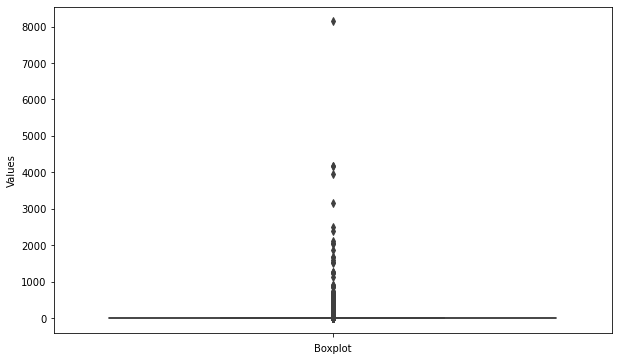

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['UnitPrice'])
plt.ylabel('Values')
plt.xlabel('Boxplot')
plt.show()

In [13]:
#outlier removal 
df  = data[(data['UnitPrice'] >= lower_bound) & (data['UnitPrice']<= upper_bound)]

In [14]:
#outlier removal in Quantity Column
q1 = data['Quantity'].quantile(.25)
q3 = data['Quantity'].quantile(.75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR 
print(lower_bound)
print(upper_bound)

-13.0
27.0


In [15]:
df  = data[(data['Quantity'] >= lower_bound) & (data['Quantity']<= upper_bound)]

In [16]:
#Feature Engineering 
#1.creating Revenue Featur by multiply Unitprice column with quantity column 
df['Revenue'] = df['Quantity']*df['UnitPrice']

C:\Users\91836\AppData\Local\Temp\ipykernel_10716\491083260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity']*df['UnitPrice']


In [18]:
df.shape

(372268, 9)

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

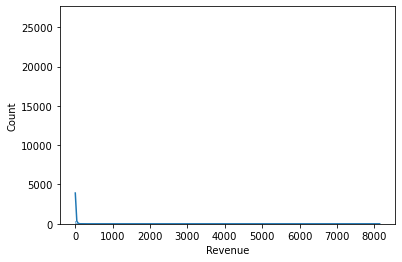

In [22]:
sns.histplot(df['Revenue'],kde =True)

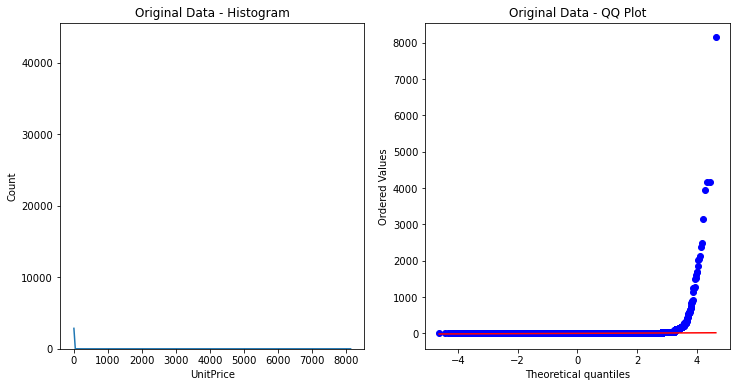

In [18]:
from scipy import stats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['UnitPrice'], kde=True)
plt.title('Original Data - Histogram')

plt.subplot(1, 2, 2)
stats.probplot(df['UnitPrice'], dist="norm", plot=plt)
plt.title('Original Data - QQ Plot')
plt.show()



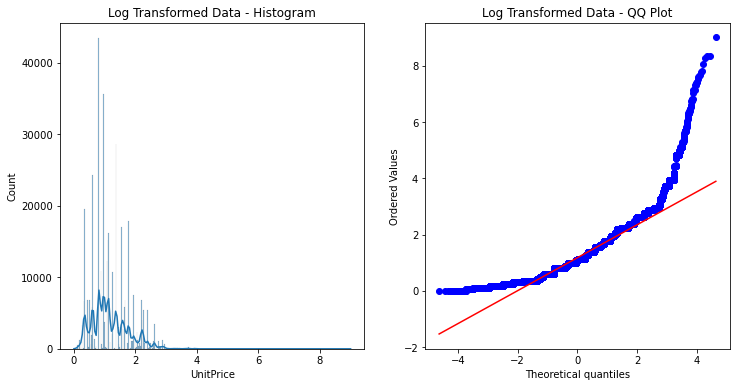

In [19]:
# Apply log transformation
log_data = np.log1p(df['UnitPrice'])  # np.log1p is used to handle zero values (log(1 + x))

# Plot log-transformed data distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(log_data, kde=True)
plt.title('Log Transformed Data - Histogram')

plt.subplot(1, 2, 2)
stats.probplot(log_data, dist="norm", plot=plt)
plt.title('Log Transformed Data - QQ Plot')
plt.show()

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\91836\AppData\Local\Temp\ipykernel_8496\3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
#working on DateTime Column 
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')


C:\Users\91836\AppData\Local\Temp\ipykernel_8496\318869032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [23]:
#datetime is converted into string function, convert it again into datetime format 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\91836\AppData\Local\Temp\ipykernel_8496\1897603116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [24]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60


In [25]:
#2.Extracting Year Month Day  and hour from the Invoice Date Column 
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour


C:\Users\91836\AppData\Local\Temp\ipykernel_8496\3970440435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year
C:\Users\91836\AppData\Local\Temp\ipykernel_8496\3970440435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
C:\Users\91836\AppData\Local\Temp\ipykernel_8496\3970440435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [26]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010,12,1,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010,12,1,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60,2010,12,1,8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367107 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    367107 non-null  object        
 1   StockCode    367107 non-null  object        
 2   Description  367107 non-null  object        
 3   Quantity     367107 non-null  int64         
 4   InvoiceDate  367107 non-null  datetime64[ns]
 5   UnitPrice    367107 non-null  float64       
 6   CustomerID   367107 non-null  float64       
 7   Country      367107 non-null  object        
 8   Revenue      367107 non-null  float64       
 9   Year         367107 non-null  int64         
 10  Month        367107 non-null  int64         
 11  Day          367107 non-null  int64         
 12  Hour         367107 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 39.2+ MB


In [28]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,12


In [29]:
#NOW, This data has been cleaned will be exporting this data from python to mysql server for query 
#!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


In [30]:
'''from sqlalchemy import create_engine

username = 'root'
password = '12345'
host = 'localhost'
database = 'Retail'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

table_name = 'Store'
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"Data imported into MySQL table '{table_name}' successfully!")'''

'from sqlalchemy import create_engine\n\nusername = \'root\'\npassword = \'12345\'\nhost = \'localhost\'\ndatabase = \'Retail\'\nengine = create_engine(f\'mysql+pymysql://{username}:{password}@{host}/{database}\')\n\ntable_name = \'Store\'\ndf.to_sql(table_name, con=engine, if_exists=\'replace\', index=False)\n\nprint(f"Data imported into MySQL table \'{table_name}\' successfully!")'

In [33]:
csv_file_path = 'clean_data.csv'
df.to_csv(csv_file_path, index=False)

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
